In [2]:
%reload_ext autoreload
%autoreload 2
%run startup.py

ag_ha = attrgetter(*'t v_0 v_c v_1 a_max'.split())
ag = attrgetter(*'x t v_0 v_c v_1 v_max a_max'.split())

def ch(v):
    for e in chain(*v):
        if e is not None:
            yield e

j = Joint(5_000, 50_000)
       
len(limits())
    

11520

<AxesSubplot:>

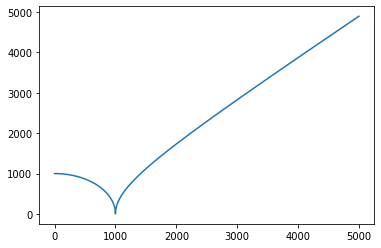

In [71]:
import numpy as np
b = j.new_block(500, 1000,1000).init()

rows = []
for v_c in range(0, j.v_max):
    
    try:
        #a = b.replace(v_c=v_c).area
        x, t_ad = accel_acd(b.v_0, v_c, b.v_1, b.joint.a_max)
    except:
        x = -1
        
    v_c_c = sqrt(4*a_max*x + 2*v_0**2 + 2*v_1**2)/2
        
    rows.append({'v_c':v_c,'v_c_c':v_c_c, 'x':x})
    
dfe = pd.DataFrame(rows)
dfe.v_c_c.plot()

In [93]:

v_max = b.joint.v_max
a_max = b.joint.a_max

ag = attrgetter(*'x t v_0 v_c v_1'.split())
x,t,v_0,v_c,v_1 = ag(b)

x_ad, t_ad = accel_acd(b.v_0, b.v_c, b.v_1, b.joint.a_max)
v_c = sqrt(4*a_max*b.x + 2*b.v_0**2 + 2*b.v_1**2)/2

b.flag, x_ad, b.v_c, v_c

('S', 250.0, 3535.5339059327375, 3535.5339059327375)

In [33]:
%reload_ext autoreload
%autoreload 2
%run startup.py
j = Joint(5_000, 50_000)

b = j.new_block(340, 1000,3000).init()

x_a, t_a = accel_xt(b.v_0, b.v_c, a_max)
x_d, t_d = accel_xt(b.v_c, b.v_1, a_max)

ag = attrgetter(*'x t v_0 v_c v_1'.split())
x,t,v_0,v_c,v_1 = ag(b)

b.v_c, (t_a, t_d, t_a+t_d), (x_a, x_d, x_a+x_d)

(4690, (0.0738, 0.0338, 0.1076), (209.961, 129.96099999999998, 339.922))

In [35]:
x_a, t_a = accel_xt(b.v_0, 0, a_max)
x_d, t_d = accel_xt(0, b.v_1, a_max)

ag = attrgetter(*'x t v_0 v_c v_1'.split())
x,t,v_0,v_c,v_1 = ag(b)

b.v_c, (t_a, t_d, t_a+t_d), (x_a, x_d, x_a+x_d)

(4690, (0.02, 0.06, 0.08), (10.0, 90.0, 100.0))

In [93]:
from trajectory.params import Info
b = j.new_block(200, 3000,3000)
print(b.x,b.v_0, b.v_1)
Info.for_t(b).u

200 3000 3000
3000 50000 0.0
3000 -50000 0.0


ULInfo(t=0, x=0, t_i=0.0, t_a=0, t_c=0, t_d=0, v_c=3000.0, x_a=0, x_c=0, x_d=0, x_ad=0.0, t_ad=0.0, hit_limit=False)

In [90]:
Info.for_t(b).l

5000 50000 0.0
5000 -50000 0.0


ULInfo(t=0, x=0, t_i=0.0, t_a=0, t_c=0, t_d=0, v_c=5000.0, x_a=0, x_c=0, x_d=0, x_ad=0.0, t_ad=0.0, hit_limit=False)